# Ejercicio- Reduccion de dimensionalidad

En este ejercicio aplicaremos técnicas de reducción de dimensiones. Para ello cargaremos el fichero mnist.pkl.gz que se encuentra en el blackboard de la asignatura.

Lo primero que se hará es cargar el dataset.

In [2]:
import numpy as np
import pandas as pd
import os, time, pickle, gzip
file = 'ejercicio-clase-1-data.gz'
f = gzip.open(file, 'rb')
train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
f.close()
X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

Imprima por pantalla las dimensiones del set de train

In [3]:
X_train.shape

(50000, 784)

Pasen los datos a formato dataframe e imprima por pantalla los principales estadísticos del mismo

In [4]:
df = pd.DataFrame(X_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022784,0.015424,0.012080,0.007218,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


Con la siguiente función se puede imprimir por pantalla el valor de una muestra

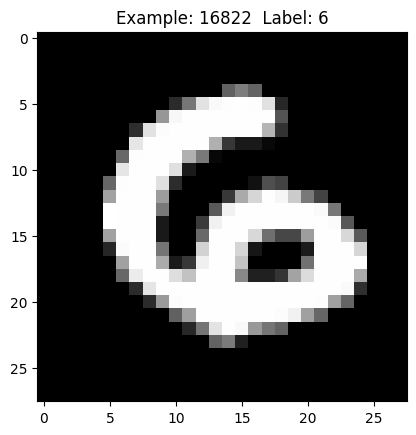

In [5]:
X_train_df = pd.DataFrame(data=X_train)
y_train_df = pd.Series(data=y_train)
import random
import matplotlib.pyplot as plt
def imprimir_digito(sample):
    label = y_train_df.loc[sample]
    image = X_train_df.loc[sample,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (sample, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()
    
sample=random.randint(0,len(y_train_df)-1)
imprimir_digito(sample)

Aplique al dataset de 'entrenamiento' un PCA con todas las posibles dimensiones de salida e imprima por pantalla el gráfico de la varianza acomulada por dimensión de destino para seleccionar el número de dimensiones a las que reducir el dataset

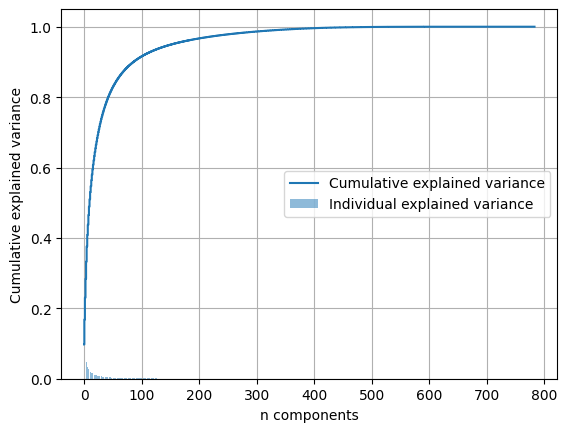

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=784)
princ_comp = pca.fit_transform(X_train)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.step(range(784), cum_sum_eigenvalues, where='mid', label='Cumulative explained variance')
plt.bar(range(784), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.grid()
plt.xlabel('n components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc='center right')
plt.show()

Imprima por pantalla un diagrama de barras con la varianza explicada por las primeras 25 componentes principales

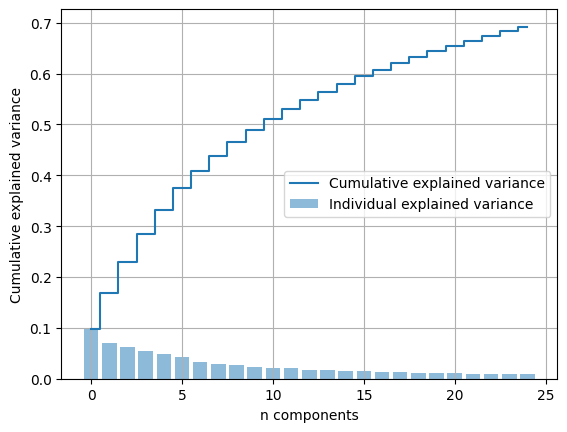

In [7]:
plt.step(range(25), cum_sum_eigenvalues[:25], where='mid', label='Cumulative explained variance')
plt.bar(range(25), exp_var_pca[:25], alpha=0.5, align='center', label='Individual explained variance')
plt.grid()
plt.xlabel('n components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc='center right')
plt.show()

Indique el número de dimensiones que contengan al menos el 90% de la varianza del dataset original

In [8]:
len(cum_sum_eigenvalues[cum_sum_eigenvalues<=0.9])

86

La siguiente función imprime por pantalla en 2 dimensiones la separación de las clases originales. 

In [9]:
import seaborn as sns
def Sep_dos_dimensiones(xdf, labels, algorithm='PCA', subset='Train'):
    aux = pd.DataFrame(data=xdf.loc[:,0:1], index=xdf.index)
    aux = pd.concat((aux,labels), axis=1, join="inner")
    aux.columns = ["1ª dim", "2ª dim", "Label"]
    sns.lmplot(x="1ª dim", y="2ª dim", hue="Label", \
               data=aux, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separacíón entre clases del set de {} usando el algo {} ".format(subset,algorithm))

Use la función anterior para imprimir por pantalla la separación entre las verdaderas clases conseguida mediante PCA (en 2 dimensiones)

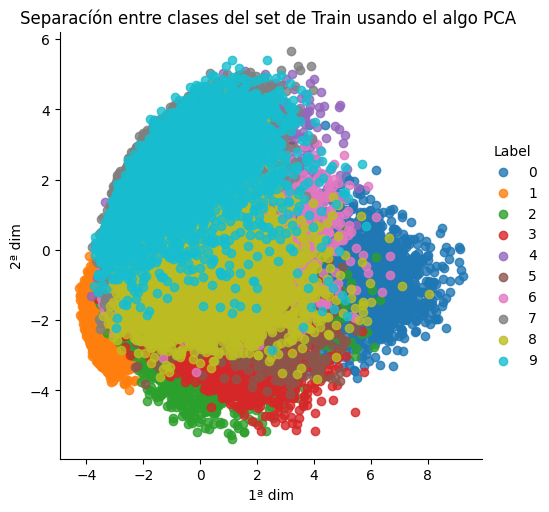

In [10]:
Sep_dos_dimensiones(pd.DataFrame(princ_comp), y_train_df, "PCA",'Train')

### t-SNE

Ahora al mismo dataset aplique un algoritmo de t-SNE con 2 componentes , un learning rate de 350 y un perplexity de 15 e imprima por pantalla la separación que se consigue con esta metodología

In [11]:
from sklearn.manifold import TSNE

In [12]:
n_components = 2
learning_rate = 350
perplexity = 15
init = 'random'
random_state = 1234
tsne = TSNE(n_components=n_components, learning_rate=learning_rate, perplexity=perplexity, \
            init=init, random_state=random_state)

X_train_tSNE = tsne.fit_transform(X_train)
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=X_train_df.index)

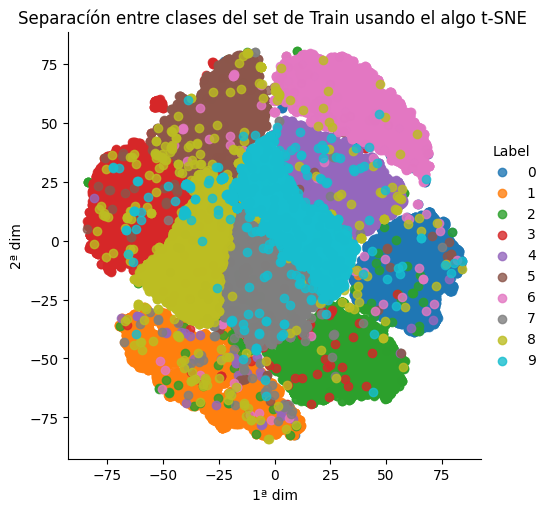

In [13]:
Sep_dos_dimensiones(X_train_tSNE, y_train_df, "t-SNE",'Train')